In [ ]:
import pandas as pd

Please note: we based this backtesting strategy on https://github.com/michaeljsong99/r-wsb-Trading-Algo



In [ ]:
df = pd.read_csv (r'/Users/michellemichalowski/Desktop/wsb_final.csv')

In [ ]:
len(df)

56133

In [ ]:
df.head()

,Unnamed: 0,Cashtag,Title,date,scores,compound,comp_score
0,0,CVE,Energy Oil &amp; Exp was the sector to be in t...,2021-04-28 20:26:09,"{'neg': 0.098, 'neu': 0.669, 'pos': 0.232, 'co...",0.7783,pos
1,1,PLTR,$AMC AND $PLTR primed for takeoff 🚀🚀🚀,2021-04-28 20:18:57,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.9517,pos
2,2,BUZZ,My thoughts and explanation of $BUZZ,2021-04-28 20:11:50,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neut
3,3,PLTR,$AMC and $PLTR primed for takeoff,2021-04-28 20:09:10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neut
4,4,BLNK,GM signed agreement with $BLNK green💚💚🌎🌎🌎🌎,2021-04-28 20:05:47,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.9828,pos


In [ ]:
#convert date 
df['date']= pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df = df[['Cashtag','comp_score']]

In [ ]:
df.head()

,Cashtag,comp_score
date,,
2021-04-28,CVE,pos
2021-04-28,PLTR,pos
2021-04-28,BUZZ,neut
2021-04-28,PLTR,neut
2021-04-28,BLNK,pos


In [ ]:
#extract only trading days 
!pip install pandas_market_calendars
import pandas_market_calendars as mcal

In [ ]:
from datetime import datetime, timedelta

In [ ]:
nyse = mcal.get_calendar('NYSE')

In [ ]:
def is_trading_day(input_date):
    trading_days = nyse.valid_days(start_date=input_date, end_date=input_date)
    if len(trading_days) == 1:
        return True
    return False

# Is tomorrow a trading day?
def is_tomorrow_trading_day(input_date):
    current_date = datetime.strptime(input_date, '%Y-%m-%d')
    next_day = current_date + timedelta(days=1)
    next_day_as_str = next_day.strftime("%Y-%m-%d")
    return is_trading_day(next_day_as_str)

In [ ]:
# remove days which are not trading days
def remove_day_after_is_not_trading(my_df):
    dates = my_df.index
    removed_dates = []
    for date in dates:
        if not is_tomorrow_trading_day(date):
            print('Removing date ' + date)
            removed_dates.append(date)
    new_df = my_df.drop(removed_dates)
    return new_df

In [ ]:
df.index = df.index.map(str)

In [ ]:
df = remove_day_after_is_not_trading(df)

Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24
Removing date 2021-04-24


Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-27
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13
Removing date 2021-03-13


Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05
Removing date 2021-03-05


Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26
Removing date 2021-02-26


Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19
Removing date 2021-02-19


Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12
Removing date 2021-02-12


Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30
Removing date 2021-01-30


Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29


Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29


Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29


Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29
Removing date 2021-01-29


Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16
Removing date 2021-01-16


Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31
Removing date 2020-12-31


Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28
Removing date 2020-11-28


Removing date 2020-10-03
Removing date 2020-10-03
Removing date 2020-10-03
Removing date 2020-10-03
Removing date 2020-10-03
Removing date 2020-10-03
Removing date 2020-10-03
Removing date 2020-10-03
Removing date 2020-10-03
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-10-02
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-26
Removing date 2020-09-25


Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-08-01
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31
Removing date 2020-07-31


Removing date 2020-05-30
Removing date 2020-05-30
Removing date 2020-05-30
Removing date 2020-05-30
Removing date 2020-05-30
Removing date 2020-05-30
Removing date 2020-05-30
Removing date 2020-05-30
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-29
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-24
Removing date 2020-05-23
Removing date 2020-05-23
Removing date 2020-05-23


In [ ]:
df_2 = pd.get_dummies(df, columns=['comp_score'])

In [ ]:
!pip install pandasql
from pandasql import sqldf

In [ ]:
df_2 = df_2[df_2['Cashtag'].str.contains("GME")]

In [ ]:
df_2 = sqldf("select date, sum(comp_score_neg) as neg, sum(comp_score_neut) as neut, sum(comp_score_pos) as pos from df_2 group by date")

In [ ]:
df_2.set_index('date', inplace=True)

In [ ]:
import matplotlib.pyplot as plt

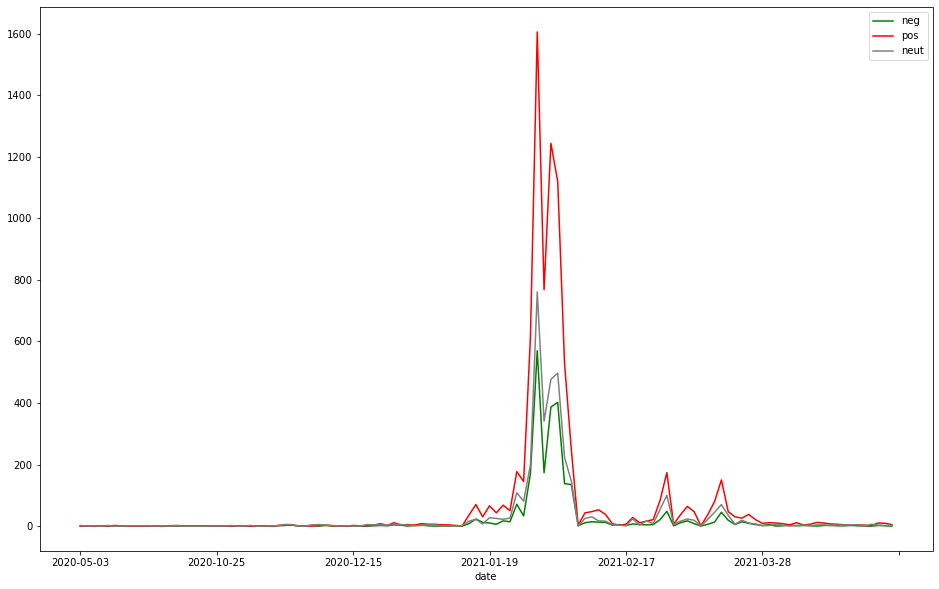

In [ ]:
ax = plt.gca()

df_2.plot(kind='line', y='neg', color='green', ax=ax, figsize=(16, 10))
df_2.plot(kind='line', y='pos', color='red', ax=ax, figsize=(16, 10))
df_2.plot(kind='line', y='neut', color='grey', ax=ax, figsize=(16, 10))

plt.show()

In [ ]:
#plot both together
#return and number of positiv comments
GME = pd.read_csv (r'/Users/michellemichalowski/Downloads/GME.csv')

In [ ]:
GME.set_index('Date', inplace=True)

In [ ]:
start_price = GME.iloc[0]['Open']

GME['GME_Return'] = GME['Close'] / start_price
GME.tail()

,Open,High,Low,Close,Adj Close,Volume,GME_Return
Date,,,,,,,
2021-04-21,158.399994,162.979996,155.919998,158.509995,158.509995,3812800,26.775337
2021-04-22,159.100006,159.100006,146.860001,151.169998,151.169998,4345800,25.535473
2021-04-23,149.000000,153.660004,144.699997,151.179993,151.179993,4029100,25.537161
2021-04-26,150.979996,174.679993,148.759995,168.929993,168.929993,10532100,28.535472
2021-04-27,183.550003,188.000000,173.169998,177.770004,177.770004,8932700,30.028717


In [ ]:
#merge
df_3 = df_2
df_3.reset_index(level=0, inplace=True)
GME.reset_index(level=0, inplace=True)

In [ ]:
GME['date'] = GME['Date']

In [ ]:
df_4 = pd.merge(df_3, GME, how='inner')

In [ ]:
df_5 = df_4[["date", "neg", "neut", "pos"]]
GME_1 = df_4[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "GME_Return"]]

In [ ]:
df_5.set_index("date", inplace=True)
GME_1.set_index("Date", inplace=True)
df_5.index = df_5.index.map(str)
GME_1.index = GME_1.index.map(str)

In [ ]:
df_5.head()

,neg,neut,pos
date,,,
2020-05-21,1,0,0
2020-05-27,0,1,0
2020-06-08,0,0,1
2020-06-09,0,2,0
2020-08-04,0,0,2


In [ ]:
GME_1.head()

,Open,High,Low,Close,Adj Close,Volume,GME_Return
Date,,,,,,,
2020-05-21,4.45,4.65,4.40,4.44,4.44,1971900,0.750000
2020-05-27,4.57,4.71,4.36,4.69,4.69,3146600,0.792230
2020-06-08,4.28,5.14,4.27,5.01,5.01,10133700,0.846284
2020-06-09,5.00,5.00,4.55,4.96,4.96,8073400,0.837838
2020-08-04,4.13,4.74,4.13,4.43,4.43,10361400,0.748311


In [ ]:
#add ratio 
df_5["ratio"] = df_5["pos"] / df_5["neg"]

<ipython-input-33-58ebb2374de3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5["ratio"] = df_5["pos"] / df_5["neg"]


In [ ]:
df_5.head()

,neg,neut,pos,ratio
date,,,,
2020-05-21,1,0,0,0.0
2020-05-27,0,1,0,NaN
2020-06-08,0,0,1,inf
2020-06-09,0,2,0,NaN
2020-08-04,0,0,2,inf


In [ ]:
df_5['MA_3'] = pd.Series.ewm(df_5['ratio'], span=3).mean()

<ipython-input-35-5a2797e07153>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['MA_3'] = pd.Series.ewm(df_5['ratio'], span=3).mean()


In [ ]:
# Given a date, get tomorrow's date.
def tomorrow_date(input_date):
    current_date = datetime.strptime(input_date, '%Y-%m-%d')
    next_day = current_date + timedelta(days=1)
    return next_day.strftime("%Y-%m-%d")

In [ ]:
def wsb_backtest(input_df, portfolio_value=1000): 
    # the idea is to buy when we have an increase in positive sentiments if not we sell the stock again  
    # size of our portfolio: 1000 Euro (student friendly because we will make a lot of losses)
    portfolio = portfolio_value
    cash = portfolio_value
    num_shares = 0
    
    portfolio_dict = {}
    
    lastRow = pd.Series([])
    
    for index, row in input_df.iterrows():
        
        next_trading_day = tomorrow_date(index)
        try:
            GME_next_open_price = GME_1.loc[next_trading_day]['Open']
            GME_next_close_price = GME_1.loc[next_trading_day]['Close']
        except:
            continue
            
        old_num_shares = num_shares
        action = 'No Trade'

                
        if lastRow.empty == False:   
            if row.pos > lastRow.pos:
                if num_shares <= 0:
                    close_short = num_shares * (-1)
                    cash -= (close_short * GME_next_open_price)
                    num_shares = 0
                    num_shares = int(cash // GME_next_open_price)
                    cash -= (num_shares * GME_next_open_price)

                    shares_bought = num_shares - old_num_shares
                    action = 'BUY ' + str(shares_bought) + ' shares'
        
            else: 
                if num_shares >= 0: 
                    cash += (num_shares * GME_next_open_price)
                    num_shares = 0
                    num_shares = -(int(cash // GME_next_open_price))
                    cash += (-num_shares * GME_next_open_price)

                    shares_sold = old_num_shares - num_shares
                    action = 'SELL ' + str(shares_sold) + ' shares'

        # update portfolio value
        holding_value = num_shares * GME_next_close_price
        portfolio = cash + holding_value
        
        net_profit = portfolio - portfolio_value
        profit_ratio = portfolio / portfolio_value
        
        portfolio_dict[next_trading_day] = [portfolio, cash, num_shares, net_profit, profit_ratio, action]
        
        lastRow = row
        
    profit_df = pd.DataFrame.from_dict(portfolio_dict, orient='index')
    profit_df.columns = ['Portfolio Value', 'Net Cash', 'Net Share Quantity', 'Net Profit', 'Profit Ratio', 'Action']
    return profit_df

In [ ]:
results = wsb_backtest(df_5)

<ipython-input-41-839a818fad64>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lastRow = pd.Series([])


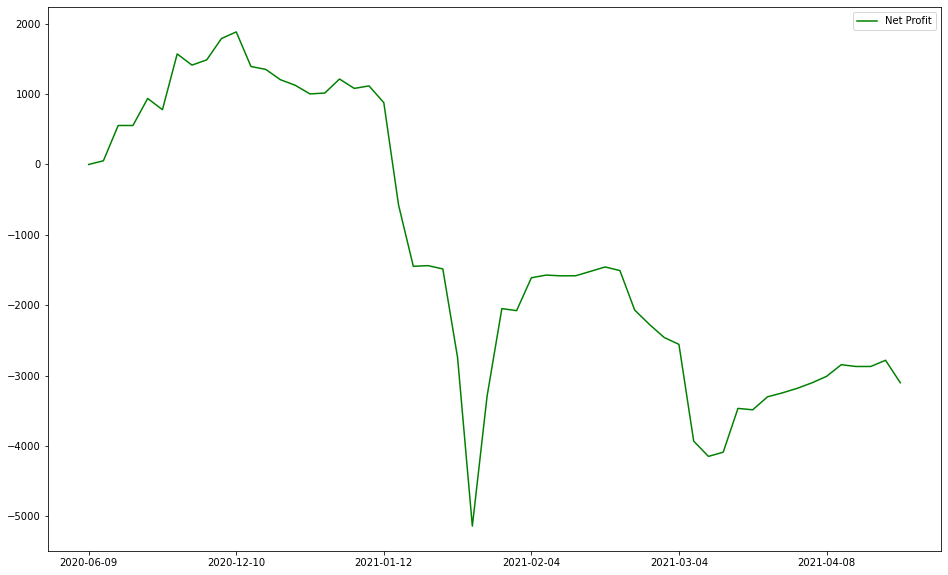

In [ ]:
ax = plt.gca()

results.plot(kind='line', y='Net Profit', color='green', ax=ax, figsize=(16, 10))

plt.show()

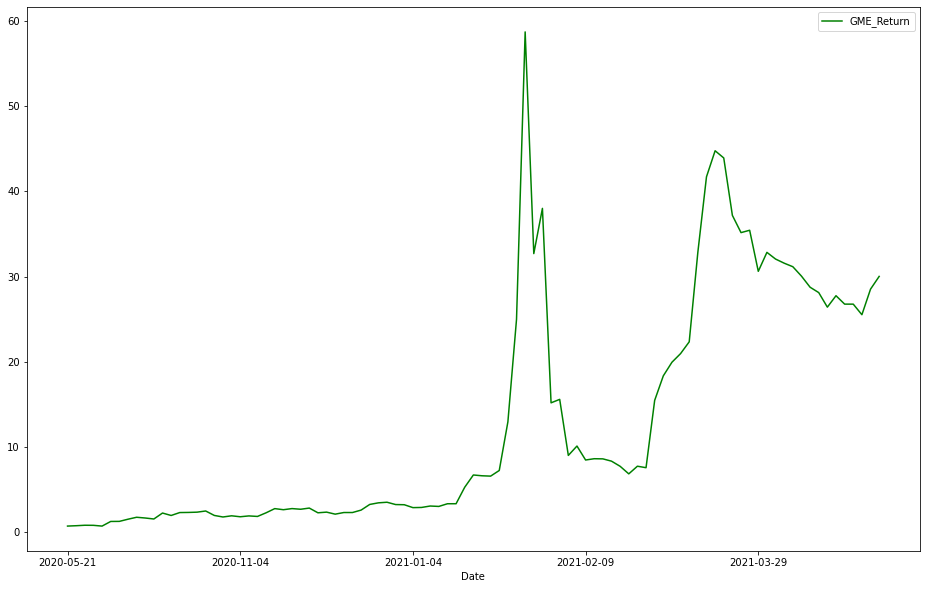

In [ ]:
ax = plt.gca()

GME_1.plot(kind='line', y='GME_Return', color='green', ax=ax, figsize=(16, 10))

plt.show()

In [ ]:
results.to_csv('results_GME.csv')